you need 3.88 minutes to boil that egg


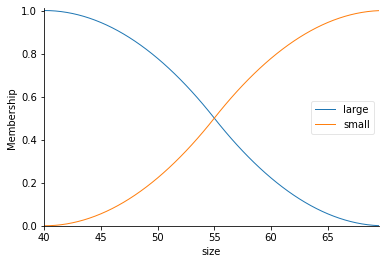

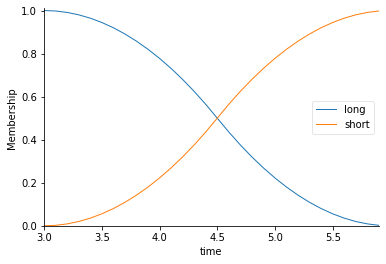

In [16]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# the crisp values for egg size is the antecedent
eggSize = ctrl.Antecedent(np.arange(40, 70, 0.5), 'size')

# the boiling time is the consequent
boilTime = ctrl.Consequent(np.arange(3, 6, 0.1), 'time')

# Determine the fuzzy sets for antecedents
eggSize['large'] = fuzz.zmf(eggSize.universe, 40, 70)
eggSize['small'] = fuzz.smf(eggSize.universe, 40, 70)

# Determine the fuzzy sets for antecedents
boilTime['long'] = fuzz.zmf(boilTime.universe, 3, 6)
boilTime['short'] = fuzz.smf(boilTime.universe, 3, 6)

# view the fuzzy set.
eggSize.view()  # uncoment to view graphic (it can fails in windows)

# Simple conditipnal rules "IF antecendent THEN consequence"
rule1 = ctrl.Rule(eggSize['large'], boilTime['long'])
rule2 = ctrl.Rule(eggSize['small'], boilTime['short'])

# view the fuzzy set.
boilTime.view()

# controller
boilerController = ctrl.ControlSystem([rule1, rule2])

# simulation
boilerSimulator = ctrl.ControlSystemSimulation(boilerController)

# input
# rawEggSize = input("please input the weight of the egg (from 40 to 70 grams)")
rawEggSize = 40.33

# ensure that is in range
clippeEggSize = float(np.clip(rawEggSize, 40, 70))

# load the value in the simulator
boilerSimulator.input['size'] = rawEggSize

# process
boilerSimulator.compute()

# output
resultTime = boilerSimulator.output['time']

print("you need %1.2f minutes to boil that egg" % resultTime)